![Churn](https://www.subscreasy.com/wp-content/uploads/2018/07/Abonelikte-Churn-Nedir-Neden-Onemlidir.png)

# What is churn?

Churn refers to the ratio of the number of customers you lost in a given period to the total number of customers. For example, if you have 1000 customers and 10 of your customers canceled their subscription that month, your churn speed corresponds to 10/1000, or 1%.

While you initially get 100 customers each month, if the churn rate is 10%, your customer count continues to increase. But if this ratio is still 10% at the point where you reach 1000 customers, then you are losing 100 customers every month. 100 new customers every month become insufficient for your growth.

The action to be taken at this point is to identify the reasons for losing customers. Churn may either be due to poor quality service, or a competitor may have started selling the same service on more attractive subscription terms.

# Meaning of terms
* **CreditScore:** It is a scoring system created by looking at a person's credit history and various risk factors. This scoring system is the first criterion that banks check in your loan application and is the most important criterion in terms of loan evaluation. For a score with a range between 300-850.
* **Tenure:** How long you can expect them to remain a customer. Tenure = 1/Churn
* **Balance:** The amount in the account.
* **EstimatedSalary:** The customer's estimated salary.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Visualizations

In [5]:
fig = px.box(df, y="Age")
fig.show()

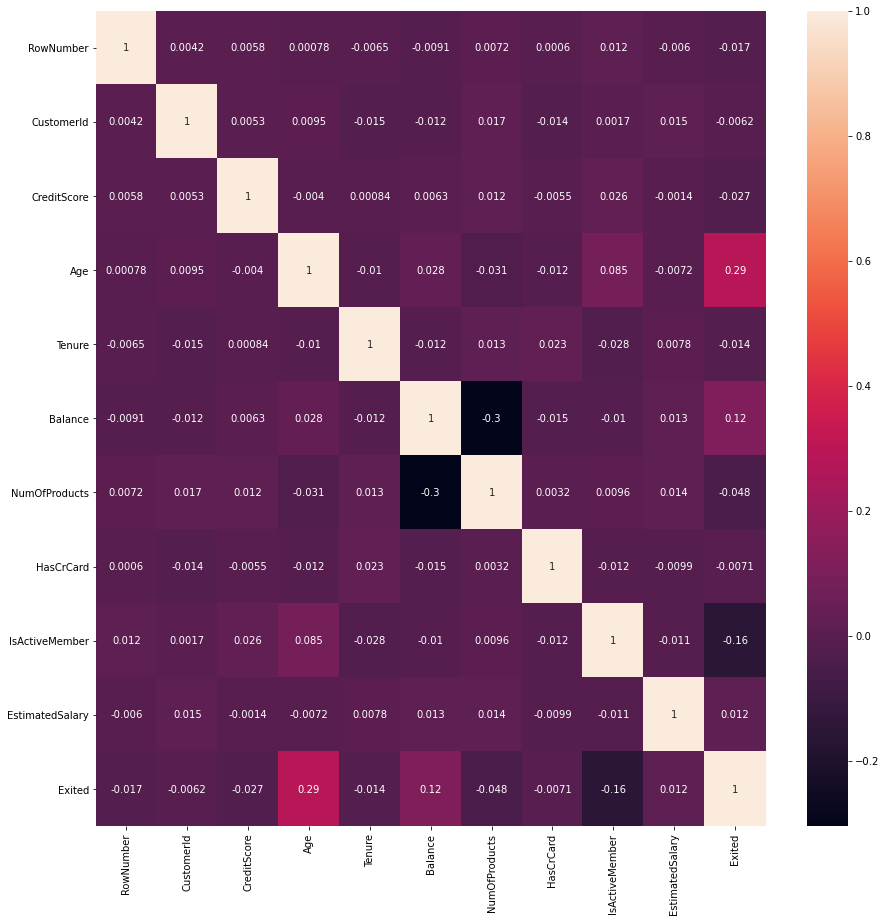

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

**Age feature enhancement**

In [7]:
age_labels = ['18-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
Age_group = pd.cut(df['Age'], range(10, 101, 10), right=False, labels=age_labels)

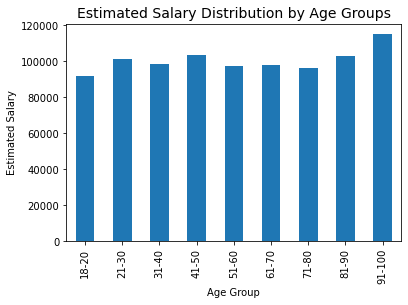

In [8]:
df.groupby(Age_group)['EstimatedSalary'].mean().plot(kind='bar',stacked=True)
plt.title("Estimated Salary Distribution by Age Groups",fontsize=14)
plt.ylabel('Estimated Salary')
plt.xlabel('Age Group');

Text(0.5, 0, 'Age Group')

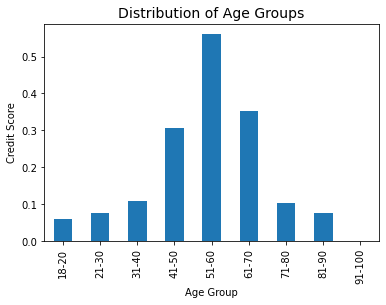

In [9]:
df.groupby(Age_group)['Exited'].mean().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Credit Score')
plt.xlabel('Age Group')

Text(34.834322916666665, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

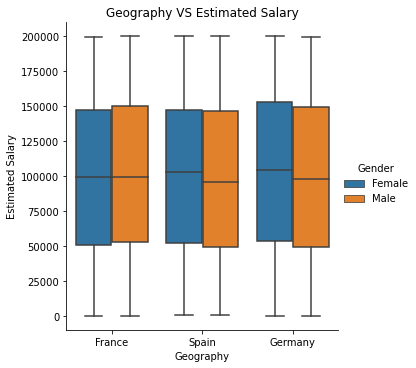

In [10]:
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

In [11]:
fig = px.box(df, x="Age", y="Geography", notched=True)
fig.show()


In [12]:
fig = px.parallel_categories(df, dimensions=['HasCrCard', 'IsActiveMember'],
                 color_continuous_scale=px.colors.sequential.Inferno,
                labels={'HasCrCard':'Credit Card Holder', 'IsActiveMember':'Activity Status'})
fig.show()

In [13]:
fig = px.parallel_categories(df, dimensions=['HasCrCard', 'Gender','IsActiveMember'],
                 color_continuous_scale=px.colors.sequential.Inferno,
                labels={'Gender':'Gender', 'HasCrCard':'Credit Card Holder', 'IsActiveMember':'Activity Status'})
fig.show()


In [14]:
fig = px.parallel_categories(df, dimensions=['IsActiveMember', 'Exited',],
                 color_continuous_scale=px.colors.sequential.Inferno,
                labels={'IsActiveMember':'Activity Status', 'Exited':'Exited Members',})
fig.show()


**Distributions**

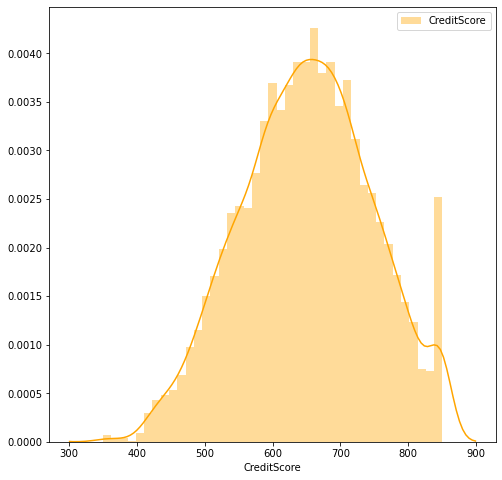

In [15]:
fig = plt.figure(figsize=(8,8))
sns.distplot(df.CreditScore, color="orange", label="CreditScore")
plt.legend();

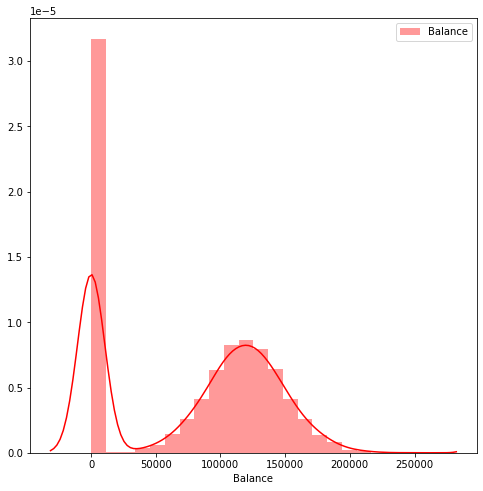

In [16]:
fig = plt.figure(figsize=(8,8))
sns.distplot(df.Balance, color="red", label="Balance")
plt.legend();

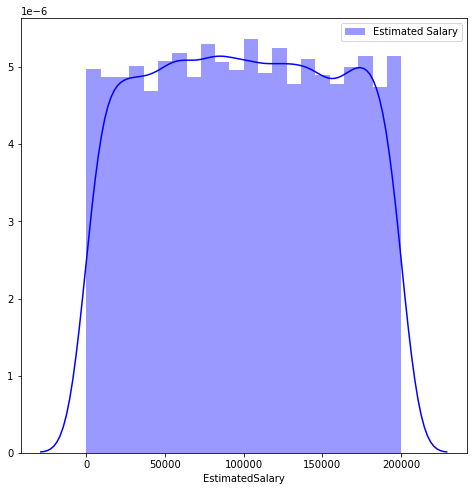

In [17]:
fig = plt.figure(figsize=(8,8))
sns.distplot(df.EstimatedSalary, color="blue", label="Estimated Salary")
plt.legend();

## Future Editing

**Drop unnecessary columns for training**

In [18]:
df.drop('RowNumber', axis = 1, inplace = True)
df.drop('CustomerId', axis = 1, inplace = True)
df.drop('Surname', axis = 1, inplace = True)

**Only three country**

In [19]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**One-hot-encoding Gender and Geography**

In [20]:
df_geo = pd.get_dummies(df['Geography'], columns= df.Geography[0], dtype= 'int64')
df_gender = pd.get_dummies(df['Gender'], columns= df.Gender[0], dtype= 'int64')

In [21]:
df = df.join(df_geo)
df = df.join(df_gender)

In [22]:
df.drop('Geography', axis = 1, inplace = True)
df.drop('Gender', axis = 1, inplace = True)

**Since there is a "Balance" value of more than three thousand 0 values, these values are arranged to be a normal distribution.**

In [23]:
df["Balance"] = df["Balance"].replace(0, np.nan)

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          6383 non-null   float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   France           10000 non-null  int64  
 10  Germany          10000 non-null  int64  
 11  Spain            10000 non-null  int64  
 12  Female           10000 non-null  int64  
 13  Male             10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


**The iterative imputer normally uses bayes. However, it was preferred to use KNN for normal distribution.**

In [26]:
imp = IterativeImputer(KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='kd_tree'))

In [27]:
df = imp.fit_transform(df)

In [28]:
df = pd.DataFrame(data=imp.transform(df), 
                             columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                                      'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany', 
                                      'Spain', 'Female', 'Male'])

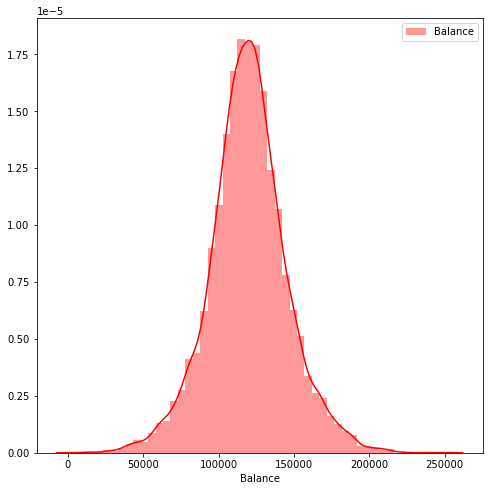

In [29]:
fig = plt.figure(figsize=(8,8))
sns.distplot(df.Balance, color="red", label="Balance")
plt.legend();

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
columns = ['CreditScore', 'Balance', 'EstimatedSalary']
for col in columns:
    column = scaler.fit_transform(df[col].values.reshape(-1, 1))
    df[col] = pd.DataFrame(data=column, columns=[col])

In [33]:
exited_df = df['Exited']
df.drop('Exited', axis = 1, inplace = True)
df = df.join(exited_df)

**Correlation matrix after feature editing**

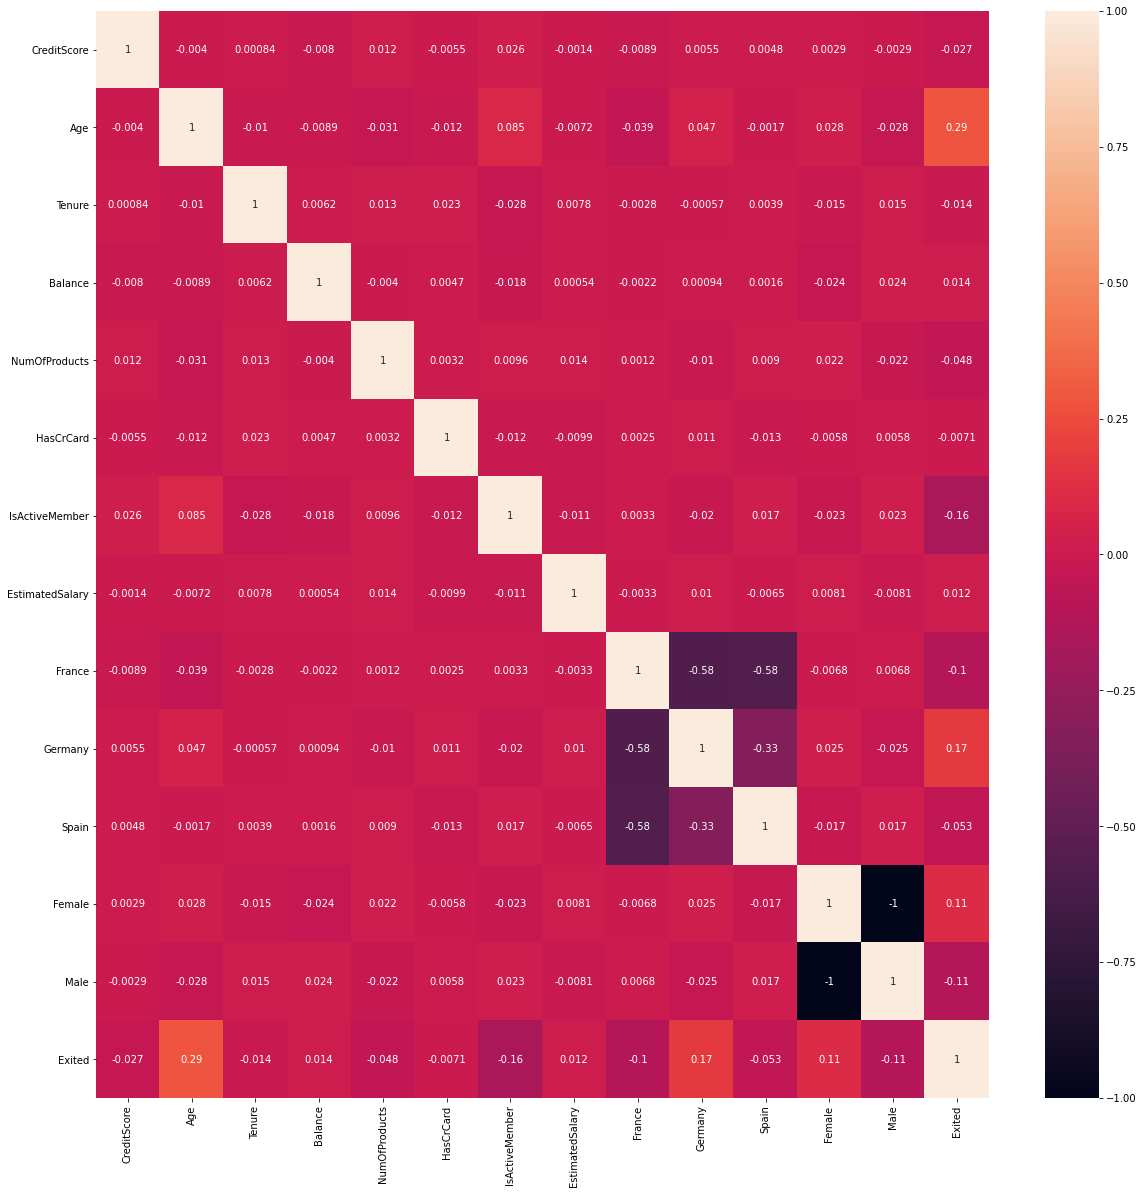

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

# Random Forest Classification

In [35]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype('float')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)
len(y_train), len(y_val)

(7000, 3000)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# fit the data
model.fit(X_train, y_train)

# Get predictions
y_preds = model.predict(X_val)

# Get score
accuracy_score(y_preds, y_val)

0.867

# PCA with K-Means

**Decide how many features we’d like to keep based on the cumulative variance plot.**

In [37]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(df)

PCA()

In [38]:
pca.explained_variance_ratio_

array([9.12444397e-01, 6.93738898e-02, 4.14119907e-03, 3.12652038e-03,
       2.80934797e-03, 2.21897266e-03, 2.01094289e-03, 1.72034709e-03,
       1.07052277e-03, 6.85106875e-04, 3.09354433e-04, 8.93993191e-05,
       2.76050884e-34, 1.23046969e-34])

Text(0, 0.5, 'Cumulative Explained Variance')

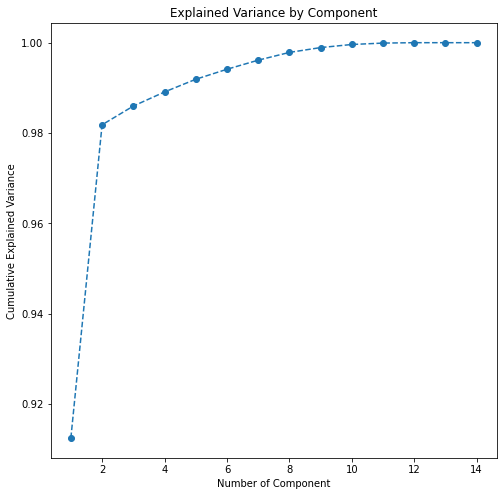

In [39]:
plt.figure(figsize = (8,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker= 'o', linestyle= '--')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance')

In [40]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

**Decide how many clustering solutions will test.**

In [41]:
from sklearn.cluster import KMeans
wccs = []
for i in range (1, 15):
    kmeans_pca = KMeans(n_clusters=i, init= 'k-means++', random_state = 42)
    kmeans_pca.fit(principalDf)
    wccs.append(kmeans_pca.inertia_)

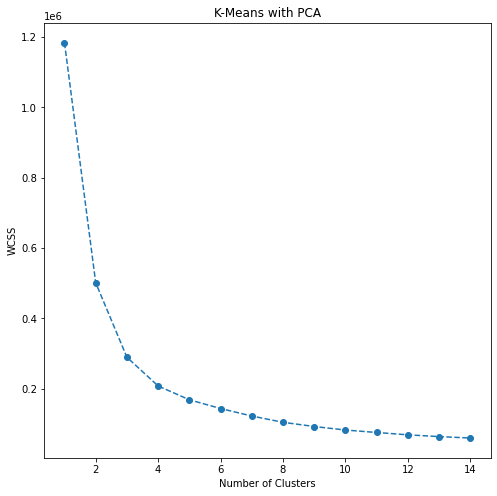

In [42]:
plt.figure(figsize = (8,8))
plt.plot(range(1,15), wccs, marker= 'o', linestyle= '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA')
plt.show()

In [43]:
kmeans_pca = KMeans(n_clusters= 2, init = 'k-means++', random_state=42)
kmeans_pca.fit(principalDf)

KMeans(n_clusters=2, random_state=42)

In [44]:
principalDf['KmeansPredict'] = kmeans_pca.labels_
principalDf

,principal component 1,principal component 2,KmeansPredict
0,3.098452,-3.010628,1
1,2.092874,-4.014535,1
2,3.073027,2.999582,1
3,0.085429,-4.014201,1
4,4.089198,-3.004932,0
...,...,...,...
9995,0.070315,-0.005393,1
9996,-3.938449,4.974572,1
9997,-2.915452,1.967130,1
9998,3.090876,-1.997253,1


**PCA with K-Means comparison**

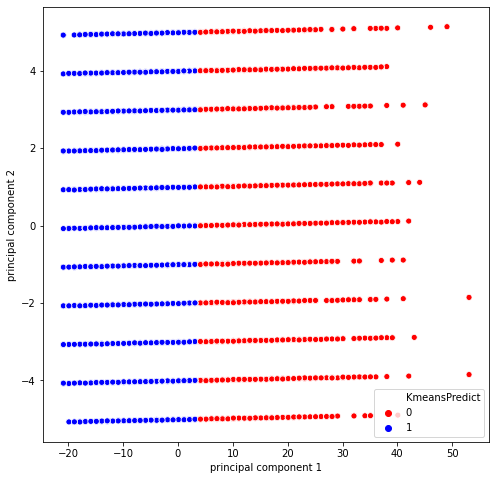

In [45]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
plt.figure(figsize= (8,8))
sns.scatterplot(x_axis, y_axis, hue= principalDf['KmeansPredict'], palette=['r', 'b'])
plt.show()

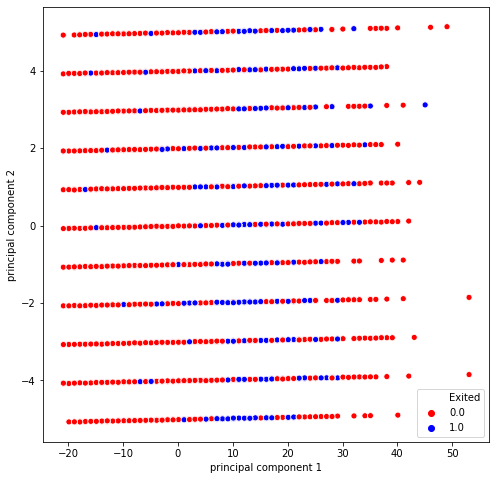

In [46]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
plt.figure(figsize= (8,8))
sns.scatterplot(x_axis, y_axis, hue= df['Exited'], palette=['r', 'b'])
plt.show()

# NN Model

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

**The reason for using orthogonal is to increase the speed of training data by increasing the number of batch.**

In [48]:
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='orthogonal', activation='softplus'))
model.add(Dense(8, kernel_initializer='orthogonal', activation='softplus'))
model.add(Dense(4, kernel_initializer='orthogonal', activation='softplus'))
model.add(Dense(1, kernel_initializer='orthogonal', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(X_train, y_train, epochs=250, batch_size= 200)

Epoch 1/250
35/35 [==============================] - 0s 1ms/step - loss: 1.5878 - accuracy: 0.7924
Epoch 2/250
35/35 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.7913
Epoch 3/250
35/35 [==============================] - 0s 1ms/step - loss: 0.5625 - accuracy: 0.7921
Epoch 4/250
35/35 [==============================] - 0s 1ms/step - loss: 0.5073 - accuracy: 0.7924
Epoch 5/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.7924
Epoch 6/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7940
Epoch 7/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7944
Epoch 8/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8014
Epoch 9/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8014
Epoch 10/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8049
Epoch 11/

35/35 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8301
Epoch 84/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8316
Epoch 85/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8313
Epoch 86/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8310
Epoch 87/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8317
Epoch 88/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8303
Epoch 89/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8329
Epoch 90/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8321
Epoch 91/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8334
Epoch 92/250
35/35 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8316
Epoch 93/250


35/35 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8553
Epoch 165/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8563
Epoch 166/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8543
Epoch 167/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.8550
Epoch 168/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8541
Epoch 169/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8517
Epoch 170/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8541
Epoch 171/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8491
Epoch 172/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8550
Epoch 173/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8529
Epoc

35/35 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8563
Epoch 246/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8523
Epoch 247/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8571
Epoch 248/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8601
Epoch 249/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8591
Epoch 250/250
35/35 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8570


In [50]:
y_preds = model.predict(X_val)
y_preds = y_preds > 0.5

In [51]:
accuracy_score(y_preds, y_val)

0.8636666666666667